# Oficina Introdutória ao Método de Monte Carlo

- __Data__: 24/10/2018
- __Condutor__: Gabriel R. Freitas

---

## 1 - Estimando Pi.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# iterando pontos aleatórios e vendo quais se encontram dentro do circulo unitário
def calc_monte_carlo(N):

    dentro = 0
    X, Y, R  = [], [], []
        
    for i in range(N):

        x, y = random.uniform(0,1), random.uniform(0,1)

        r = np.sqrt(x**2+y**2)

        X.append(x)
        Y.append(y)
        R.append(r)

        if r <= 1:
            dentro += 1

    return dentro/N, X, Y, R # retorna uma enupla com o percentual

In [3]:
N = 1000000
percentual_dentro = calc_monte_carlo(N)[0]

A_total = 1 # área do cubo com cantos em [(0,0),(0,1),(1,0),(1,1)]
A_dentro = percentual_dentro*A_total
A_circ = 4*A_dentro

# como A = πR², temos que π = A/R² = A, logo,

pi_estimado = A_circ
pi_exato    = np.pi

In [4]:
print(f'π estimado = {pi_estimado}')
print(f'π exato    = {pi_exato}')

print(f'\nDiferença Percentual = {100*abs(pi_estimado-pi_exato)/pi_exato}%')

π estimado = 3.141696
π exato    = 3.141592653589793

Diferença Percentual = 0.0032896184070470643%


#### Visualizando a simulação:

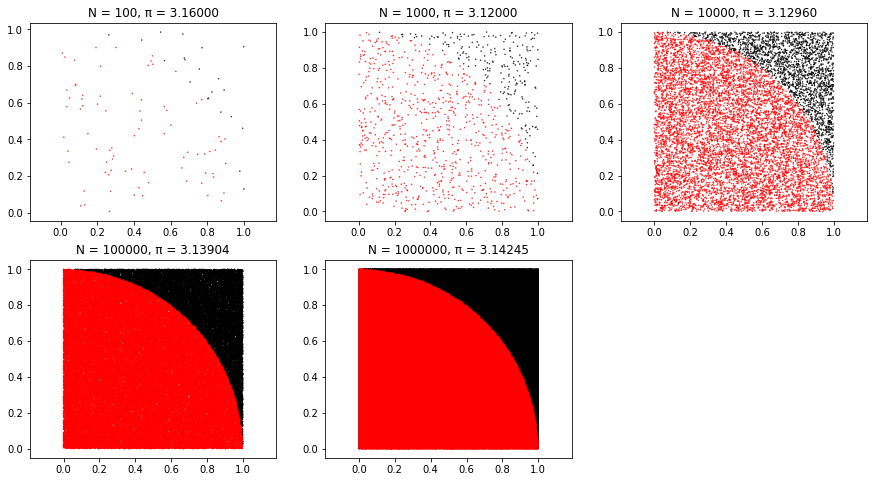

In [5]:
plt.figure(figsize=(15,8))

Ns = [100, 1000, 10000, 100000, 1000000]

for N in Ns:
    
    percentual_dentro, X, Y, R = calc_monte_carlo(N)

    colors = np.where(np.array(R)<=1,'r','k')
    
    plt.subplot(2, 3, np.log10(N)-1)
    plt.title('N = {}, π = {:.5f}'.format(N,4*percentual_dentro))
    plt.scatter(X, Y, c=colors, s=0.2)
    plt.axis('equal')
    
plt.show()

---

## 2 - Cálculo da Incerteza da Força Gravitacional

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

<h4><center>$F=G \dfrac{M_1M_2}{r^2}$</center></h4>

In [7]:
N = 1000000
G = 6.67408e-11

M1 = 40e4
M2 = 30e4
r  = 5

σ_M1 = 0.05e4
σ_M2 = 0.01e4
σ_r  = 0.05

Geramos valores aleatórios seguindo uma distribuição gaussiana de medições, com a média
e desvio padrões especificados.

In [8]:
M1_vals = np.random.normal(M1, σ_M1, N)
M2_vals = np.random.normal(M2, σ_M2, N)
r_vals  = np.random.normal(r,  σ_r,  N)

In [9]:
F_vals = G*M1_vals*M2_vals/r_vals**2
μ_monte_carlo  = F_vals.mean()
σ_monte_carlo = F_vals.std()

In [10]:
print('Distribuição de Forças:\n')
print(f'μ: {round(μ_monte_carlo, 4)} N')
print(f'σ: {round(σ_monte_carlo, 4)} N')

Distribuição de Forças:

μ: 0.3204 N
σ: 0.0064 N


Podemos conferir os valores utilizando o método de propagação de incertezas por derivadas parciais.

<h3><center>
$\sigma_F^2=
\left(\frac{\partial F}{\partial M_1}\right)^2\sigma_{M_1}^2 +
\left(\frac{\partial F}{\partial M_2}\right)^2\sigma_{M_2}^2 + 
\left(\frac{\partial F}{\partial r}\right)^2\sigma_{r}^2 $
</center></h3>

In [11]:
σ_F = np.sqrt(((G*M2/r**2)**2)*(σ_M1**2)+((G*M1/r**2)**2)*(σ_M2**2)+((2*G*M1*M2/r**3)**2)*(σ_r**2))

In [12]:
print(f'σ Monte Carlo: {σ_monte_carlo}')
print(f'σ Deriv Parc : {σ_F}\n')
print(f'Diferença Percentual: {100*abs(σ_monte_carlo - σ_F)/σ_F} %')

σ Monte Carlo: 0.006415423002806762
σ Deriv Parc : 0.006420506586143649

Diferença Percentual: 0.07917729339080556 %


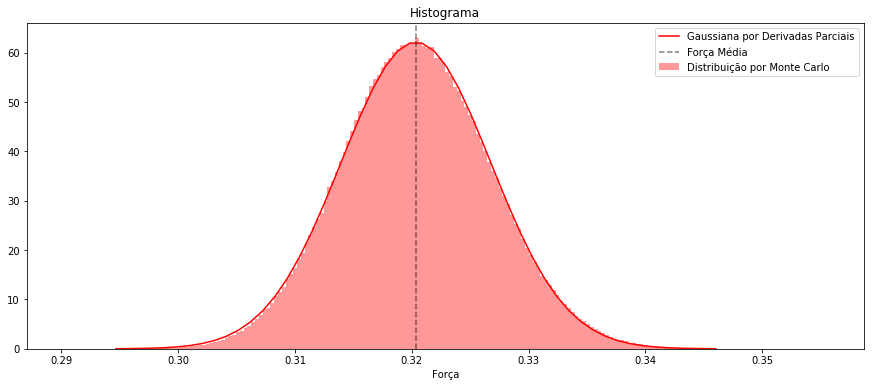

In [13]:
plt.figure(figsize=(15,6))

plt.hist(F_vals, density=True, bins=200, color='r', alpha=.4)

μ = G*M1*M2/r**2
x = np.linspace(μ - 4*σ_F, μ + 4*σ_F)
plt.plot(x,mlab.normpdf(x, μ, σ_F), color='r')

plt.axvline(x=μ, linestyle='--', color='k', alpha=.5)

plt.title('Histograma')
plt.xlabel('Força')
plt.legend(['Gaussiana por Derivadas Parciais',
            'Força Média',
            'Distribuição por Monte Carlo'])
plt.show()

---

## 3 - Random Walk Contínua

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

#### Partindo da origem e dado N passos unitários em direções aleatórias, qual a probabilidade de você retornar ao círculo unítario inicial?

In [15]:
def random_walk(passos):

    r_i, θ_i = 0, 0
    
    for i in range(passos):
        
        # escolhe ângulo aleatório
        θ = random.uniform(0,2*np.pi)
        
        # atualiza o raio
        r = np.sqrt(1 + r_i**2 + 2*r_i*np.cos(θ-θ_i))
        
        # atualiza o ângulo
        θ_i = θ_i + np.arctan2(np.sin(θ-θ_i), r_i + np.cos(θ-θ_i))
        
        r_i = r
        
    return r

In [16]:
N = 50000
probabilidades = []

print('Probabilidade de se retornar ao círculo unitário depois de N passos:')
print('-'*50)

for n_passos in range(2,21):
    
    dentro = 0

    for j in range(N):
        
        r = random_walk(n_passos)
        
        if r <= 1:
            dentro = dentro + 1
            
    p = dentro/N
        
    probabilidades.append(p)
    
    print('{:2} Passos - Calculado: {:2.2%} / Teórico: {:4.2%}'.format(n_passos,p,1/(n_passos+1)))

Probabilidade de se retornar ao círculo unitário depois de N passos:
--------------------------------------------------
 2 Passos - Calculado: 33.55% / Teórico: 33.33%
 3 Passos - Calculado: 25.06% / Teórico: 25.00%
 4 Passos - Calculado: 20.08% / Teórico: 20.00%
 5 Passos - Calculado: 16.71% / Teórico: 16.67%
 6 Passos - Calculado: 14.41% / Teórico: 14.29%
 7 Passos - Calculado: 12.57% / Teórico: 12.50%
 8 Passos - Calculado: 11.01% / Teórico: 11.11%
 9 Passos - Calculado: 10.17% / Teórico: 10.00%
10 Passos - Calculado: 9.07% / Teórico: 9.09%
11 Passos - Calculado: 8.34% / Teórico: 8.33%
12 Passos - Calculado: 7.79% / Teórico: 7.69%
13 Passos - Calculado: 7.04% / Teórico: 7.14%
14 Passos - Calculado: 6.74% / Teórico: 6.67%
15 Passos - Calculado: 6.04% / Teórico: 6.25%
16 Passos - Calculado: 5.82% / Teórico: 5.88%
17 Passos - Calculado: 5.56% / Teórico: 5.56%
18 Passos - Calculado: 5.26% / Teórico: 5.26%
19 Passos - Calculado: 4.96% / Teórico: 5.00%
20 Passos - Calculado: 4.68% / Teóri

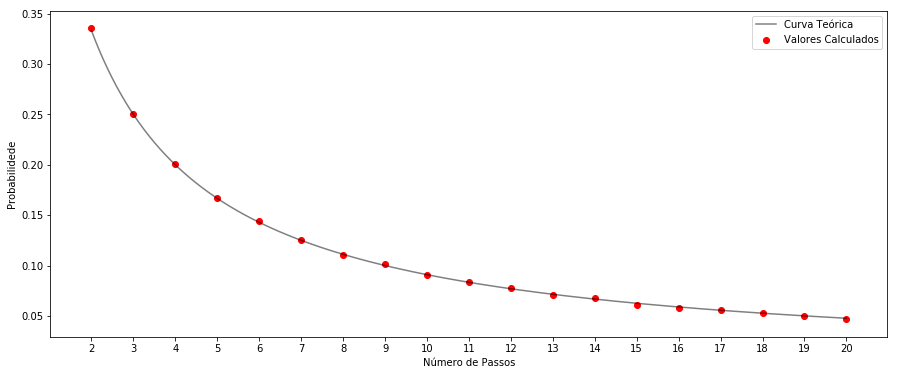

In [17]:
plt.figure(figsize=(15,6))

x = np.linspace(2,20,1000)
plt.plot(x, 1/(x+1),c='k', alpha=.5)

plt.scatter(range(2,21), probabilidades, color='r')

plt.xticks(range(2,21))
plt.legend(['Curva Teórica', 'Valores Calculados'])
plt.xlabel('Número de Passos')
plt.ylabel('Probabilidede')
plt.show()

---